In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('Imputed_hris_ats_data.csv')
df.drop(columns=['Unnamed: 0','Candidate ID'],axis=1,inplace=True)
df = df.round(2)
df.columns = df.columns.str.replace(' ', '_')
df_manager = df[df['Is_Manager?']==1]
df_non_manager = df[df['Is_Manager?']==0]

In [ ]:
##Proportion of Managers to Non Managers
print(str(round((df[df['Is_Manager?']==1].shape[0]/df.shape[0]),2)*100) + '%')

In [ ]:
##Engagement Profile across various job function

##High potential candidate profile

##Interview scores are evaluation entities


In [ ]:
df['Time_Since_Last_Hire'].plot(kind='kde')


##Given that this distribution plot represents the time period an employee is working at the company, here’s a more specific interpretation:

# Bimodal Distribution Explanation:
# Two Groups of Employees: The two peaks in the plot suggest that there are two distinct groups of employees based on how long they've worked at the company:
# First Peak (around 3-5 years): This could represent employees who are in their early to mid-tenure, possibly including new hires who have stayed with the company for a few years.
# Second Peak (around 8-10 years): This might correspond to a more seasoned group of employees who have been with the company for a longer period, possibly indicating a stable cohort of long-term employees.
# Symmetry:
# The somewhat symmetrical nature of the plot suggests that the employees' durations with the company are relatively evenly distributed between these two groups. There isn't a heavy skew towards either shorter or longer tenures.
# Tails and Gaps:
# The density falls off sharply on both sides beyond these two peaks, meaning there aren't many employees with either very short or very long tenures. Employees tend to stay within a certain time frame (between roughly 3-10 years).
# The gap between the peaks (around 5-8 years) may indicate a time range where fewer employees remain, suggesting higher attrition or turnover during that period.
# Possible Insights:
# High Attrition Early On: Employees may leave the company before they hit the 3-5 year mark, explaining the sharp increase toward that first peak.
# Employee Stability: Once employees pass the 3-5 year threshold, they may have a higher likelihood of staying longer, which could explain the second peak at 8-10 years.
# Potential for Retention Strategies: If there's a clear distinction between early-tenured and long-tenured employees, the company might focus on tailored retention strategies for those in their 3-5 year tenure range to prevent attrition before reaching the long-tenured group.

In [ ]:
import matplotlib.pyplot as plt

# Plot the KDEs for the three engagement columns
df['Engagement_3'].plot(kind='kde', label='Engagement 3')
df['Engagement_2'].plot(kind='kde', label='Engagement 2')
df['Engagement_1'].plot(kind='kde', label='Engagement 1')

# Add title and labels
plt.title('Engagement KDE Plots')
plt.xlabel('Engagement Score')
plt.ylabel('Density')

# Add a legend to differentiate the plots
plt.legend()

In [51]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Job_Level_Numerical'] = label_encoder.fit_transform(df['Job_Level_'])


In [52]:
import warnings
warnings.filterwarnings('ignore')

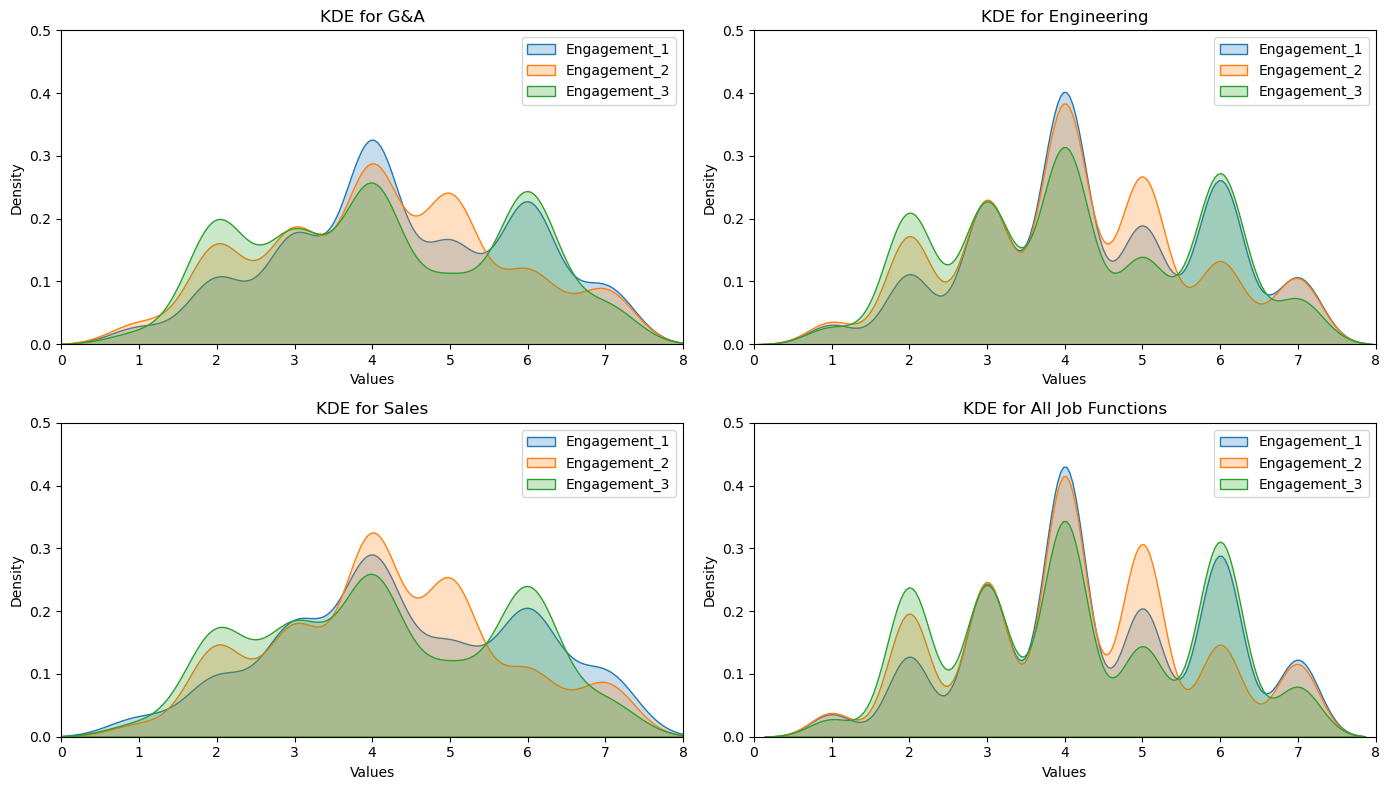

In [53]:
import seaborn as sns



# Assuming df is your DataFrame containing the data
# df = pd.read_csv('your_data.csv')

# Get unique job functions
job_functions = df['Job_Function'].unique()

# Define number of rows and columns for the grid (adjust depending on how many job functions you have)
n_cols = 2  # Number of columns in the grid
n_rows = (len(job_functions) + n_cols - 1) // n_cols  # Number of rows needed

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()
p = 0
# Loop through each job function and plot the KDEs on each subplot
for i, job in enumerate(job_functions):
    df_job = df[df['Job_Function'] == job]
    
    # Plot KDEs for eng1, eng2, and eng3
    sns.kdeplot(df_job['Engagement_1'], label='Engagement_1', fill=True, ax=axes[i])
    sns.kdeplot(df_job['Engagement_2'], label='Engagement_2', fill=True, ax=axes[i])
    sns.kdeplot(df_job['Engagement_3'], label='Engagement_3', fill=True, ax=axes[i])
    axes[i].set_xlim(0, 8)
    axes[i].set_ylim(0, 0.5)
    
    axes[i].set_title(f'KDE for {job}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    p = i
sns.kdeplot(df['Engagement_1'], label='Engagement_1', fill=True, ax=axes[p+1])
sns.kdeplot(df['Engagement_2'], label='Engagement_2', fill=True, ax=axes[p+1])
sns.kdeplot(df['Engagement_3'], label='Engagement_3', fill=True, ax=axes[p+1])
axes[p+1].set_xlim(0, 8)
axes[p+1].set_ylim(0, 0.5)
axes[p+1].set_title(f'KDE for All Job Functions')
axes[p+1].set_xlabel('Values')
axes[p+1].set_ylabel('Density')
axes[p+1].legend()


plt.tight_layout()
plt.show()

# Inferences
# The plots follow a somewhat similar trajectory for the mean sampling however if we look at the extremes G&A and sales teams 
# Eng1 and eng3 scores have less density on the lower extremes compared to Engineering every so slightly

# The distribution of Eng2 score follows a different trajectory to the other 2 across all job functions indicating a potential 
# Area to improve upon

# We can clearly see the eng2 scores distributed heavily around the mean while plateuing towards the edges Where has eng1 and eng3 have distinct peaks 
# Closer to the extremes

# Also noticable is the pdf density of the distributions suggesting G&A and sales have less density around the mean compared to Engineering

# Particular focus on the sales team whose values Whose eng1 scores have lesser density around the mean compared to other teams

# Observations:
# Comparison Across Job Functions:

# The distributions for Engagement_1, Engagement_2, and Engagement_3 follow similar patterns across different job functions.
# There are visible peaks at similar values (e.g., around 4 and 6), indicating that the engagement levels are somewhat consistent across these job functions.
# G&A and Sales:

# Both the G&A and Sales job functions show higher density for Engagement_1, Engagement_2, and Engagement_3 around the values of 4 and 6.
# This might indicate similar patterns of engagement for these roles, which could reflect common behaviors in administrative and sales-related activities.
# Engineering:

# The Engineering plot shows a more pronounced peak around 4 for Engagement_3, indicating higher engagement at this level for engineers.
# This could suggest that Engagement_3 is the most frequent level of engagement in this job function, or engineers may have a more uniform engagement pattern compared to other functions.
# All Job Functions:

# The overall pattern across all job functions closely mirrors the individual functions, with strong peaks at 4 and 6 for all three engagement columns.
# This suggests that, across the board, these levels of engagement are the most common, possibly reflecting standard practices or employee behaviors within the organization.
# Key Inferences:
# Engagement Peaks: There are clear peaks at engagement levels of around 4 and 6 across all job functions, suggesting that these engagement levels are commonly achieved across the board.
# Consistency Across Functions: While there are small differences, the engagement patterns seem quite consistent across the different job functions. This may imply that the factors driving engagement (such as management style, job role structure, or company culture) are uniform across the organization.
# Engineering Slight Variations: Engineers show slightly different peaks, which could indicate that their engagement patterns vary a little from the other functions. This might be due to the nature of their work requiring more sustained or focused engagement.


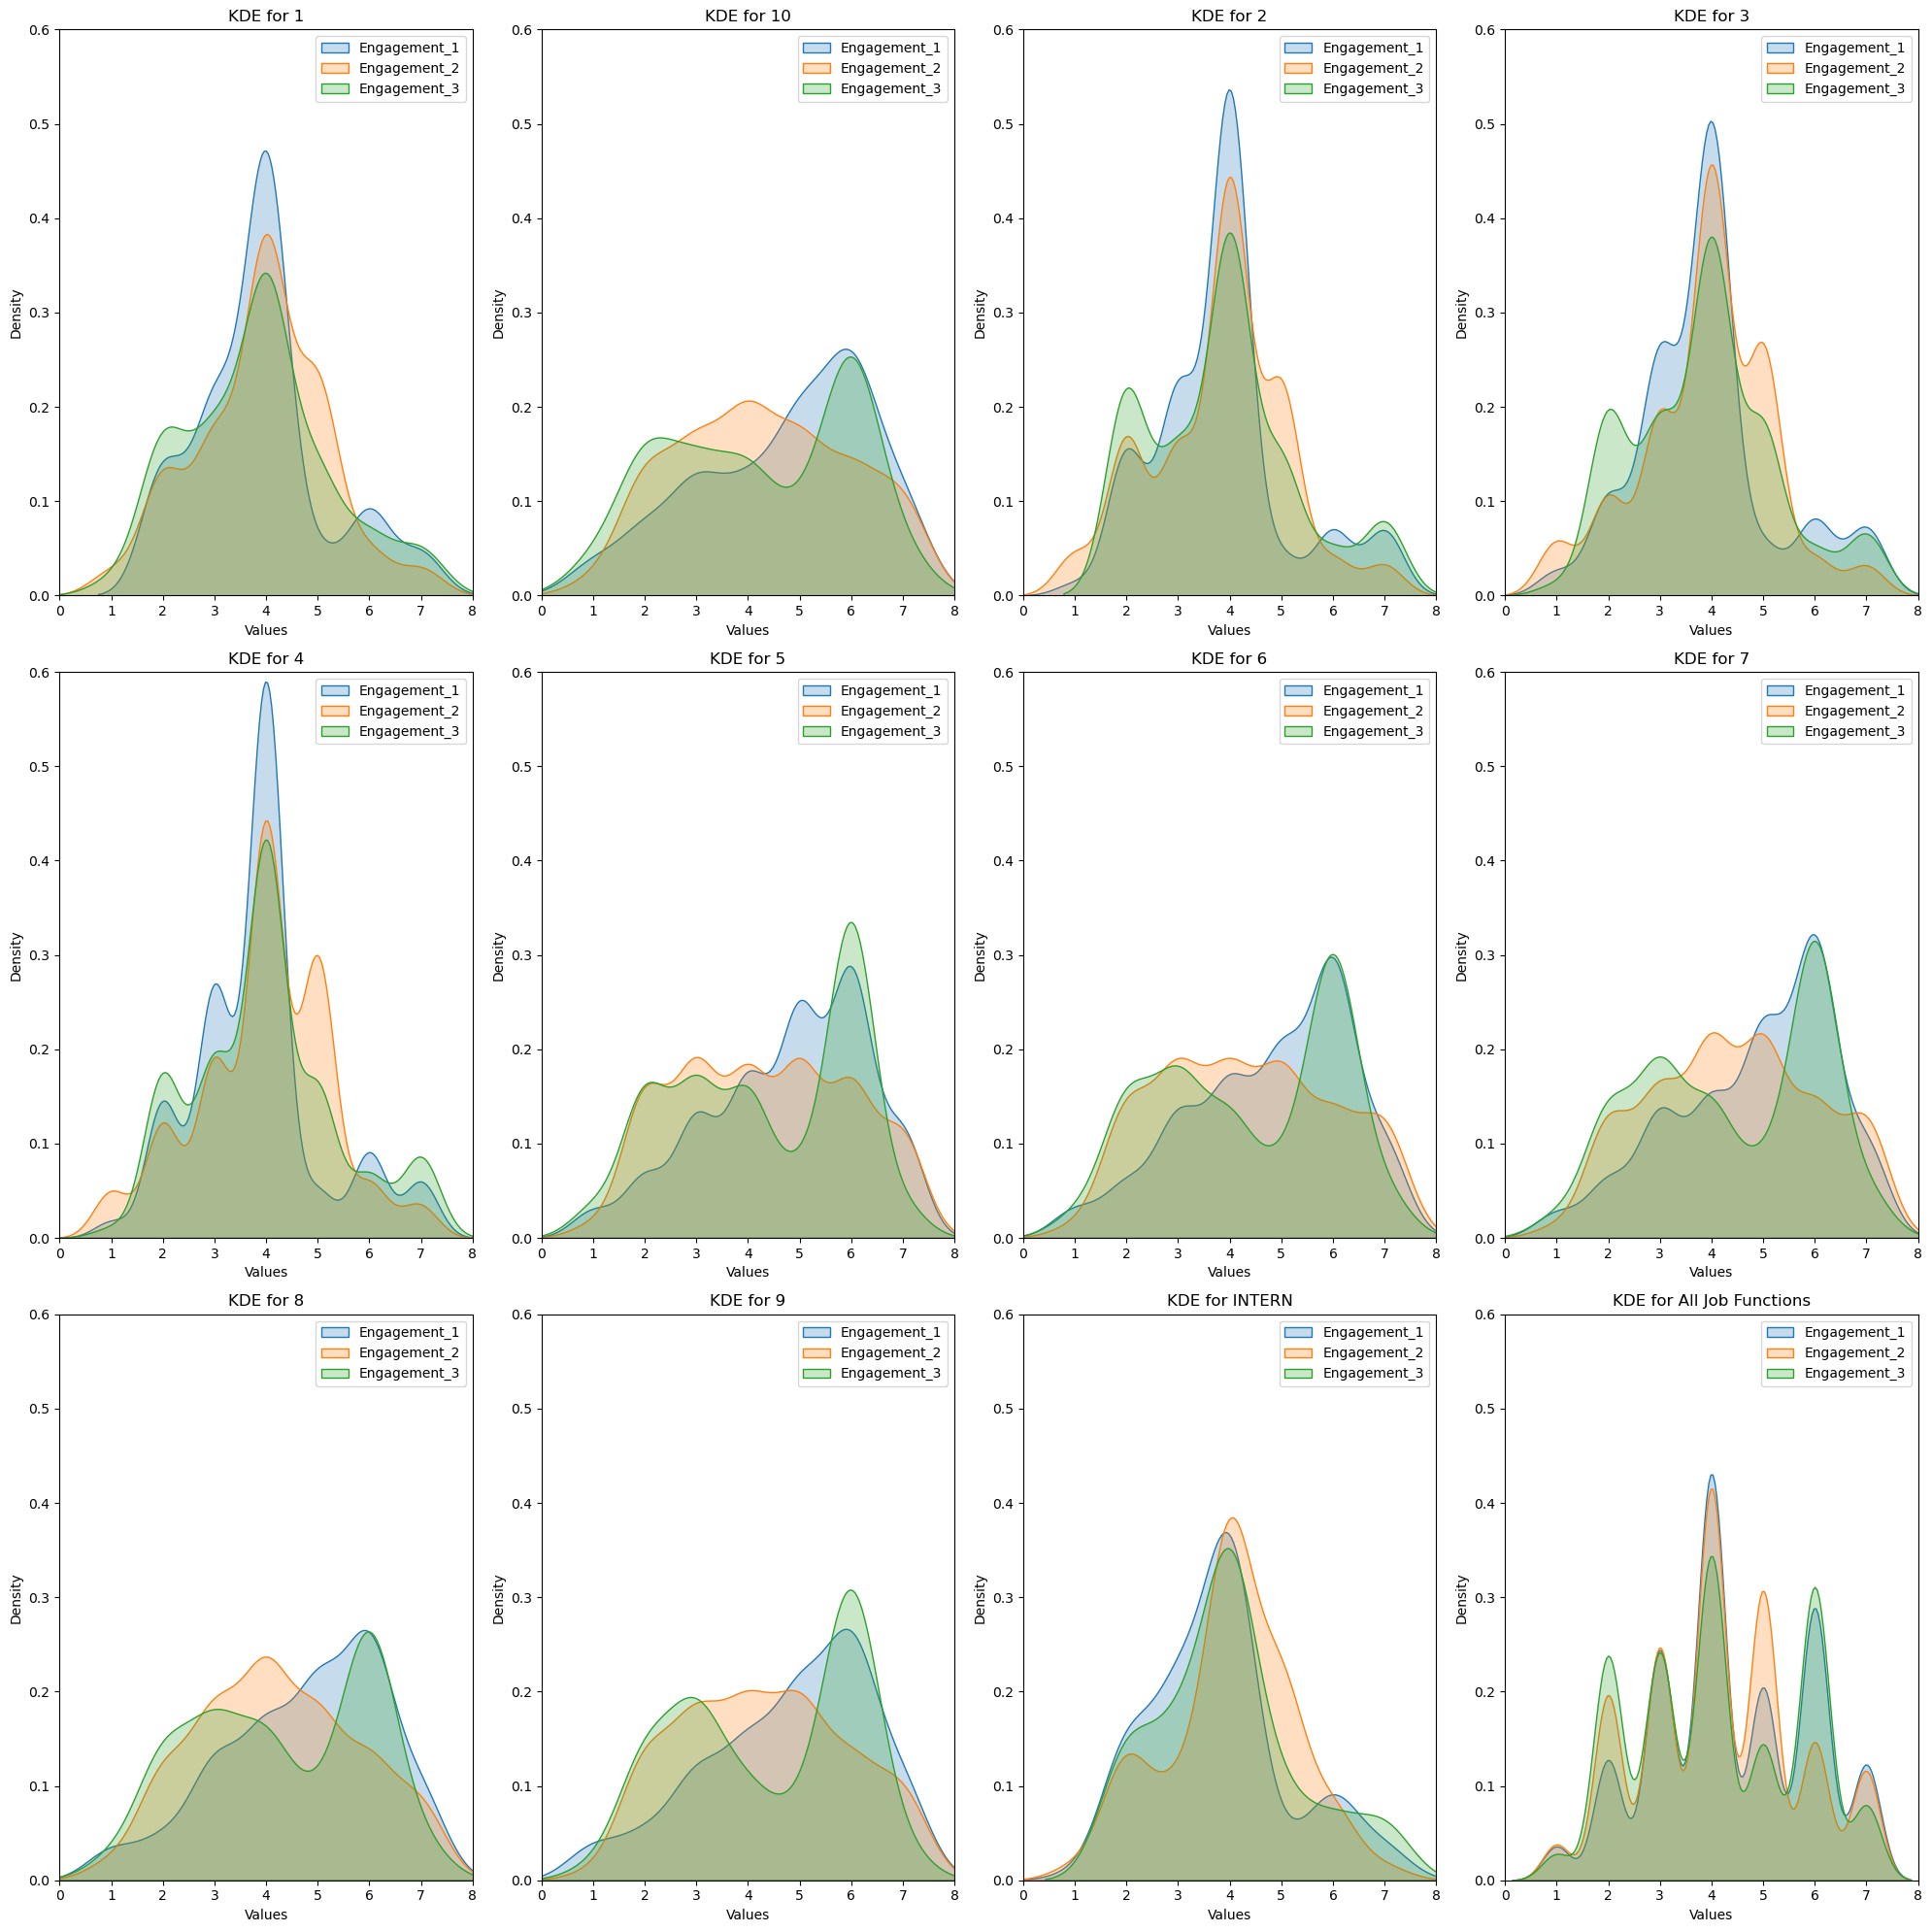

In [54]:
# Assuming df is your DataFrame containing the data
# df = pd.read_csv('your_data.csv')

# Get unique job functions
job_functions = df['Job_Level_'].unique()
def custom_sort(item):
    if isinstance(item, int):
        return (0, item)  # Numbers will come first
    else:
        return (1, item)  # Strings will come after

job_functions = sorted(job_functions, key=custom_sort)

# Define number of rows and columns for the grid (adjust depending on how many job functions you have)
n_cols = 4  # Number of columns in the grid
n_rows = (len(job_functions) + n_cols - 1) // n_cols  # Number of rows needed

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()
p = 0
# Loop through each job function and plot the KDEs on each subplot
for i, job in enumerate(job_functions):
    df_job = df[df['Job_Level_'] == job]
    
    # Plot KDEs for eng1, eng2, and eng3
    sns.kdeplot(df_job['Engagement_1'], label='Engagement_1', fill=True, ax=axes[i])
    sns.kdeplot(df_job['Engagement_2'], label='Engagement_2', fill=True, ax=axes[i])
    sns.kdeplot(df_job['Engagement_3'], label='Engagement_3', fill=True, ax=axes[i])
    axes[i].set_xlim(0, 8)
    axes[i].set_ylim(0, 0.6)
    
    axes[i].set_title(f'KDE for {job}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    p = i
sns.kdeplot(df['Engagement_1'], label='Engagement_1', fill=True, ax=axes[p+1])
sns.kdeplot(df['Engagement_2'], label='Engagement_2', fill=True, ax=axes[p+1])
sns.kdeplot(df['Engagement_3'], label='Engagement_3', fill=True, ax=axes[p+1])
axes[p+1].set_xlim(0, 8)
axes[p+1].set_ylim(0, 0.6)
axes[p+1].set_title(f'KDE for All Job Functions')
axes[p+1].set_xlabel('Values')
axes[p+1].set_ylabel('Density')
axes[p+1].legend()


plt.tight_layout()
plt.show()

##ENG levels are significantly higher for higher levels which is to be expected and the observed dip in the eng 2 levels 
##can also be explained if we observe its distribution in job levels < 5

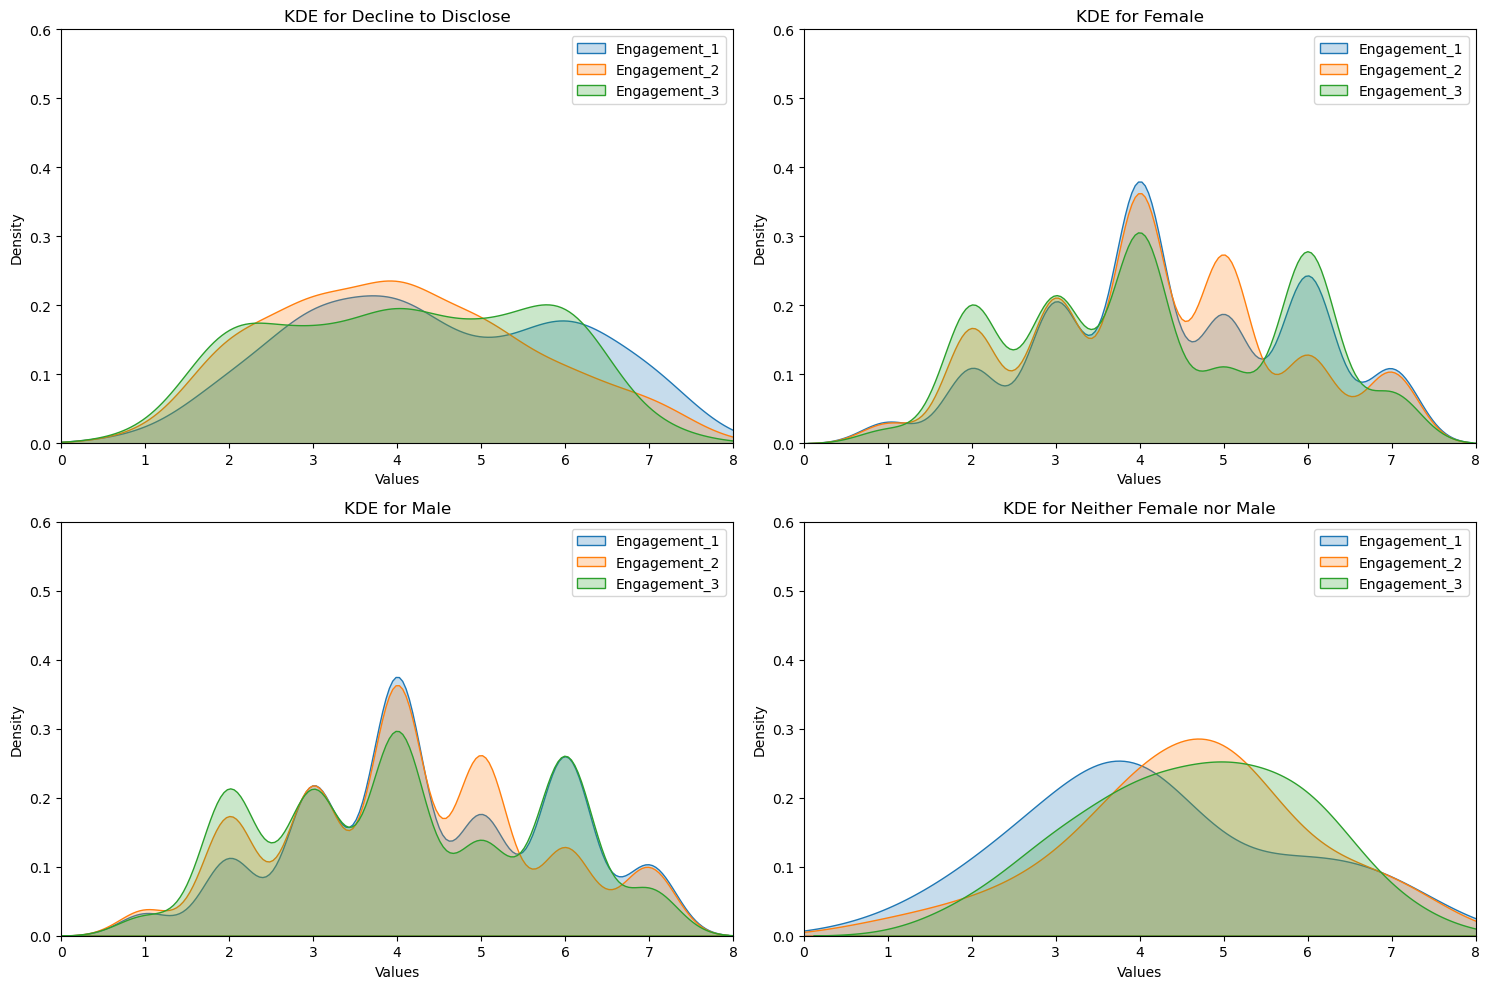

In [55]:
job_functions = df['Gender'].unique()
def custom_sort(item):
    if isinstance(item, int):
        return (0, item)  # Numbers will come first
    else:
        return (1, item)  # Strings will come after

job_functions = sorted(job_functions, key=custom_sort)

# Define number of rows and columns for the grid (adjust depending on how many job functions you have)
n_cols = 2  # Number of columns in the grid
n_rows = (len(job_functions) + n_cols - 1) // n_cols  # Number of rows needed

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()
p = 0
# Loop through each job function and plot the KDEs on each subplot
for i, job in enumerate(job_functions):
    df_job = df[df['Gender'] == job]
    
    # Plot KDEs for eng1, eng2, and eng3
    sns.kdeplot(df_job['Engagement_1'], label='Engagement_1', fill=True, ax=axes[i])
    sns.kdeplot(df_job['Engagement_2'], label='Engagement_2', fill=True, ax=axes[i])
    sns.kdeplot(df_job['Engagement_3'], label='Engagement_3', fill=True, ax=axes[i])
    axes[i].set_xlim(0, 8)
    axes[i].set_ylim(0, 0.6)
    
    axes[i].set_title(f'KDE for {job}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    p = i



plt.tight_layout()
plt.show()

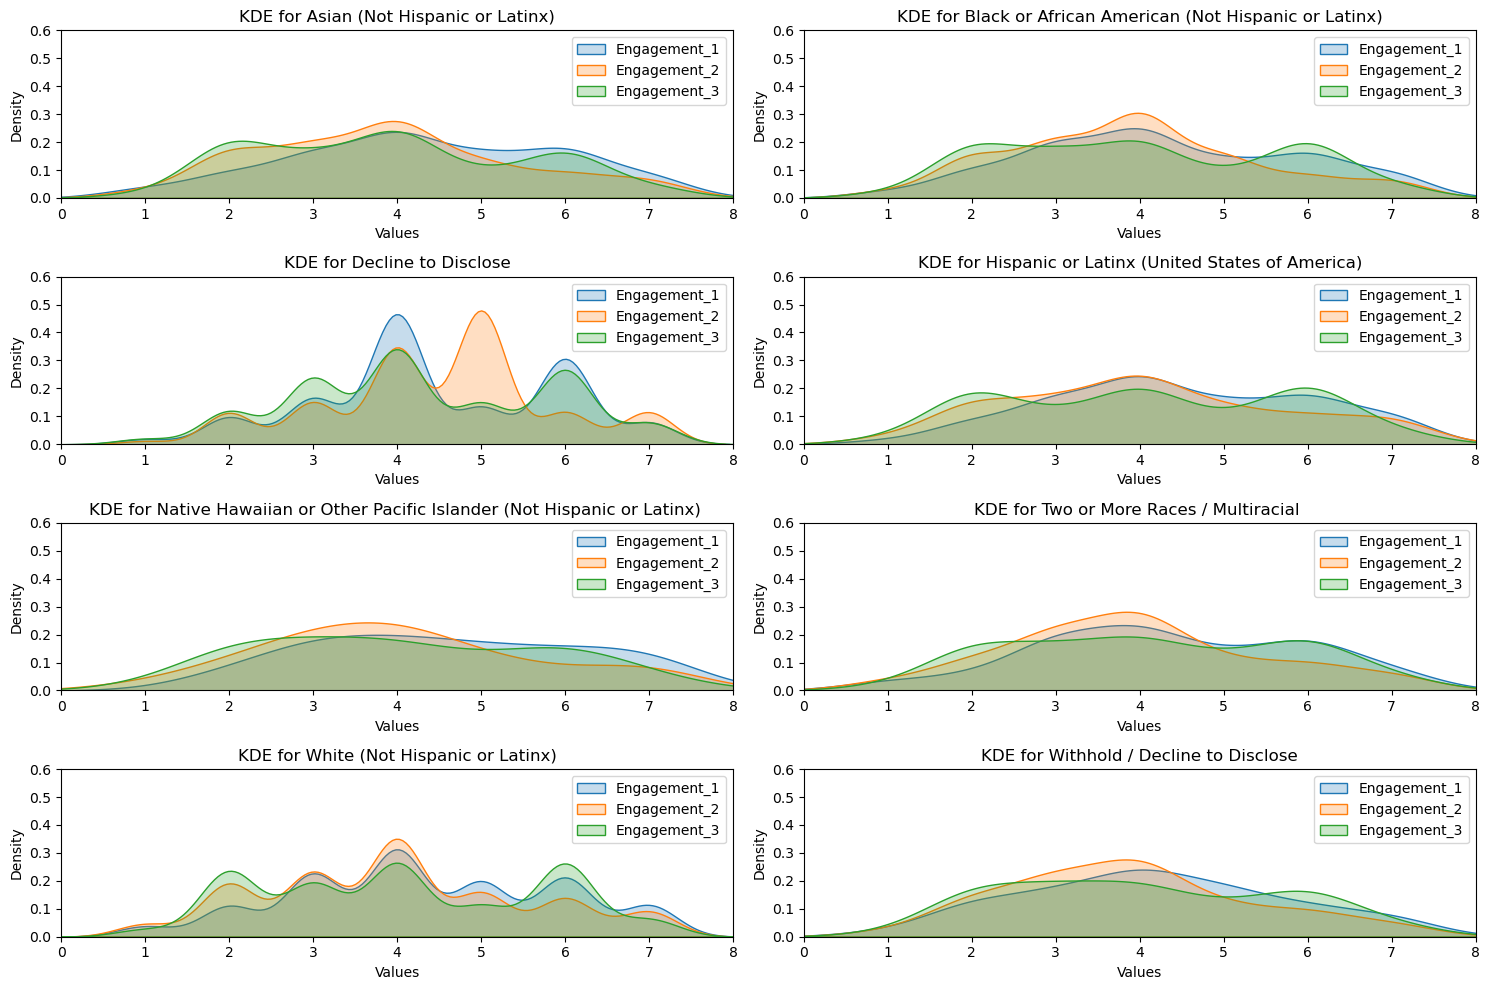

In [56]:
job_functions = df['US_Ethnicity'].unique()
def custom_sort(item):
    if isinstance(item, int):
        return (0, item)  # Numbers will come first
    else:
        return (1, item)  # Strings will come after

job_functions = sorted(job_functions, key=custom_sort)

# Define number of rows and columns for the grid (adjust depending on how many job functions you have)
n_cols = 2  # Number of columns in the grid
n_rows = (len(job_functions) + n_cols - 1) // n_cols  # Number of rows needed

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()
p = 0
# Loop through each job function and plot the KDEs on each subplot
for i, job in enumerate(job_functions):
    df_job = df[df['US_Ethnicity'] == job]
    
    # Plot KDEs for eng1, eng2, and eng3
    sns.kdeplot(df_job['Engagement_1'], label='Engagement_1', fill=True, ax=axes[i])
    sns.kdeplot(df_job['Engagement_2'], label='Engagement_2', fill=True, ax=axes[i])
    sns.kdeplot(df_job['Engagement_3'], label='Engagement_3', fill=True, ax=axes[i])
    axes[i].set_xlim(0, 8)
    axes[i].set_ylim(0, 0.6)
    
    axes[i].set_title(f'KDE for {job}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    p = i



plt.tight_layout()
plt.show()

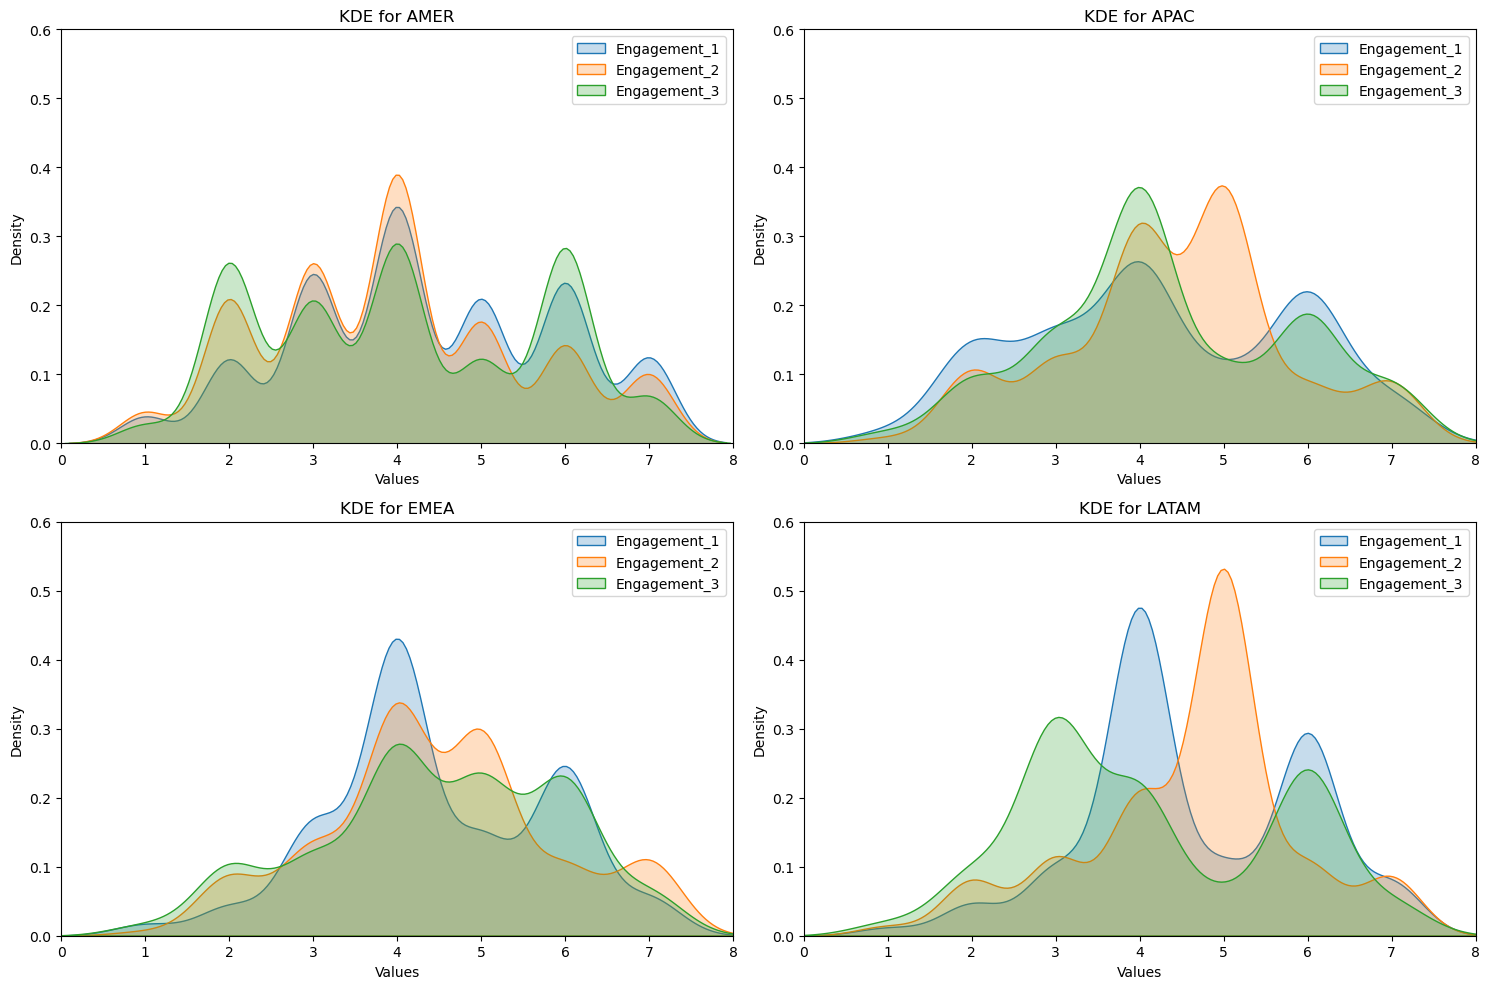

In [57]:
job_functions = df['Region'].unique()
def custom_sort(item):
    if isinstance(item, int):
        return (0, item)  # Numbers will come first
    else:
        return (1, item)  # Strings will come after

job_functions = sorted(job_functions, key=custom_sort)

# Define number of rows and columns for the grid (adjust depending on how many job functions you have)
n_cols = 2  # Number of columns in the grid
n_rows = (len(job_functions) + n_cols - 1) // n_cols  # Number of rows needed

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()
p = 0
# Loop through each job function and plot the KDEs on each subplot
for i, job in enumerate(job_functions):
    df_job = df[df['Region'] == job]
    
    # Plot KDEs for eng1, eng2, and eng3
    sns.kdeplot(df_job['Engagement_1'], label='Engagement_1', fill=True, ax=axes[i])
    sns.kdeplot(df_job['Engagement_2'], label='Engagement_2', fill=True, ax=axes[i])
    sns.kdeplot(df_job['Engagement_3'], label='Engagement_3', fill=True, ax=axes[i])
    axes[i].set_xlim(0, 8)
    axes[i].set_ylim(0, 0.6)
    
    axes[i].set_title(f'KDE for {job}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    p = i



plt.tight_layout()
plt.show()

In [58]:
import scipy.stats as stats

# Assuming df is your DataFrame with engagement and gender columns
# df = pd.read_csv('your_data.csv')

# Perform ANOVA test if there are more than two groups in the gender column

AA = ['Engagement_1','Engagement_2','Engagement_3']

for x in AA:

    unique_genders = df['Gender'].unique()

    # Prepare the engagement score arrays for each gender
    engagement_by_gender = [df[df['Gender'] == gender][x] for gender in unique_genders]

    anova_result = stats.f_oneway(*engagement_by_gender)



    # Extract the p-value from the result
    p_value = anova_result.pvalue
    print(f"P-value from ANOVA test: {p_value}")

    # Interpretation
    alpha = 0.05  # Significance level

    if p_value < alpha:
        print(f"Reject the null hypothesis: Gender has a statistically significant impact on {x}")
    else:
        print(f"Fail to reject the null hypothesis: Gender does not have a statistically significant impact on {x}")

    unique_ethnicities = df['US_Ethnicity'].unique()

    # Prepare the engagement score arrays for each gender
    engagement_by_ethnicity = [df[df['US_Ethnicity'] == gender][x] for gender in unique_ethnicities]

    anova_result = stats.f_oneway(*engagement_by_ethnicity)

    # Extract the p-value from the result
    p_value = anova_result.pvalue
    print(f"P-value from ANOVA test: {p_value}")

    # Interpretation
    alpha = 0.05  # Significance level

    if p_value < alpha:
        print(f"Reject the null hypothesis: Ethnicity has a statistically significant impact on {x}")
    else:
        print(f"Fail to reject the null hypothesis: Ethnicity does not have a statistically significant impact on {x}")
        
    unique_regions = df['Region'].unique()

    # Prepare the engagement score arrays for each gender
    engagement_by_region = [df[df['Region'] == gender][x] for gender in unique_regions]

    anova_result = stats.f_oneway(*engagement_by_region)

    # Extract the p-value from the result
    p_value = anova_result.pvalue
    print(f"P-value from ANOVA test: {p_value}")

    # Interpretation
    alpha = 0.05  # Significance level

    if p_value < alpha:
        print(f"Reject the null hypothesis: Region has a statistically significant impact on {x}")
    else:
        print(f"Fail to reject the null hypothesis: Region does not have a statistically significant impact on {x}")
        
    unique_genders = df['Promoted_Last_Cycle'].unique()

    # Prepare the engagement score arrays for each gender
    engagement_by_gender = [df[df['Promoted_Last_Cycle'] == gender][x] for gender in unique_genders]

    anova_result = stats.f_oneway(*engagement_by_gender)



    # Extract the p-value from the result
    p_value = anova_result.pvalue
    print(f"P-value from ANOVA test: {p_value}")

    # Interpretation
    alpha = 0.05  # Significance level

    if p_value < alpha:
        print(f"Reject the null hypothesis: Promotion has a statistically significant impact on {x}")
    else:
        print(f"Fail to reject the null hypothesis: Promotion does not have a statistically significant impact on {x}")


P-value from ANOVA test: 0.7357485049052404
Fail to reject the null hypothesis: Gender does not have a statistically significant impact on Engagement_1
P-value from ANOVA test: 0.08110052011490992
Fail to reject the null hypothesis: Ethnicity does not have a statistically significant impact on Engagement_1
P-value from ANOVA test: 2.5356792444421012e-05
Reject the null hypothesis: Region has a statistically significant impact on Engagement_1
P-value from ANOVA test: 0.30228970094517627
Fail to reject the null hypothesis: Promotion does not have a statistically significant impact on Engagement_1
P-value from ANOVA test: 0.1250069865677555
Fail to reject the null hypothesis: Gender does not have a statistically significant impact on Engagement_2
P-value from ANOVA test: 1.437261272443726e-28
Reject the null hypothesis: Ethnicity has a statistically significant impact on Engagement_2
P-value from ANOVA test: 1.719417246214087e-32
Reject the null hypothesis: Region has a statistically sign

In [59]:
### Ethnicity has a statistically significant impact on Engagement_2 and Engagement_3
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assume 'df' is your DataFrame with 'ethnicity' and engagement columns

# Perform ANOVA for Engagement_2
model_engagement_2 = ols('Engagement_2 ~ US_Ethnicity', data=df).fit()
anova_table_eng2 = sm.stats.anova_lm(model_engagement_2, typ=2)
print(anova_table_eng2)

# Perform ANOVA for Engagement_3
model_engagement_3 = ols('Engagement_3 ~ US_Ethnicity', data=df).fit()
anova_table_eng3 = sm.stats.anova_lm(model_engagement_3, typ=2)
print(anova_table_eng3)

# Post-hoc test for Engagement_2 (Tukey's HSD)
tukey_result_eng2 = pairwise_tukeyhsd(df['Engagement_2'], df['US_Ethnicity'])
print(tukey_result_eng2)

# Post-hoc test for Engagement_3 (Tukey's HSD)
tukey_result_eng3 = pairwise_tukeyhsd(df['Engagement_3'], df['US_Ethnicity'])
print(tukey_result_eng3)

                    sum_sq      df         F        PR(>F)
US_Ethnicity    326.579175     7.0  21.35276  1.437261e-28
Residual      11099.416223  5080.0       NaN           NaN
                    sum_sq      df         F    PR(>F)
US_Ethnicity     79.055338     7.0  4.472728  0.000056
Residual      12826.979253  5080.0       NaN       NaN
                                                             Multiple Comparison of Means - Tukey HSD, FWER=0.05                                                              
                               group1                                                              group2                               meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                     Asian (Not Hispanic or Latinx)                  Black or African American (Not Hispanic or Latin

In [60]:
df_eng_2_eth = pd.DataFrame(data=tukey_result_eng3._results_table.data[1:], 
                  columns=tukey_result_eng3._results_table.data[0])
df_eng_3_eth = pd.DataFrame(data=tukey_result_eng3._results_table.data[1:], 
                  columns=tukey_result_eng3._results_table.data[0])


In [61]:

# The data suggests that ethnicity, for the most part, is not strongly associated with differences in Engagement_2 values.
# The "Decline to Disclose" group stands out, showing higher engagement compared to Asian and White groups. This could warrant further investigation.
##"Decline to Disclose" Group: This group stands out, showing significantly higher Engagement_3 and Engagement_2 scores compared to Asian and White groups.
##This could indicate that people who choose not to disclose their ethnicity might have different engagement characteristics.

In [62]:
###Region has a statistical significance on all engagement scores
model_engagement_1 = ols('Engagement_1 ~ Region', data=df).fit()
anova_table_eng1 = sm.stats.anova_lm(model_engagement_1, typ=2)
print(anova_table_eng1)

model_engagement_2 = ols('Engagement_2 ~ Region', data=df).fit()
anova_table_eng2 = sm.stats.anova_lm(model_engagement_2, typ=2)
print(anova_table_eng2)

# Perform ANOVA for Engagement_3
model_engagement_3 = ols('Engagement_3 ~ Region', data=df).fit()
anova_table_eng3 = sm.stats.anova_lm(model_engagement_3, typ=2)
print(anova_table_eng3)

tukey_result_eng1 = pairwise_tukeyhsd(df['Engagement_1'], df['Region'])
print(tukey_result_eng1)

# Post-hoc test for Engagement_2 (Tukey's HSD)
tukey_result_eng2 = pairwise_tukeyhsd(df['Engagement_2'], df['Region'])
print(tukey_result_eng2)

# Post-hoc test for Engagement_3 (Tukey's HSD)
tukey_result_eng3 = pairwise_tukeyhsd(df['Engagement_3'], df['Region'])
print(tukey_result_eng3)

df_eng_1_reg = pd.DataFrame(data=tukey_result_eng1._results_table.data[1:], 
                  columns=tukey_result_eng1._results_table.data[0])
df_eng_2_reg = pd.DataFrame(data=tukey_result_eng3._results_table.data[1:], 
                  columns=tukey_result_eng3._results_table.data[0])
df_eng_3_reg = pd.DataFrame(data=tukey_result_eng3._results_table.data[1:], 
                  columns=tukey_result_eng3._results_table.data[0])

                sum_sq      df         F    PR(>F)
Region       54.888782     3.0  8.007692  0.000025
Residual  11616.104143  5084.0       NaN       NaN
                sum_sq      df          F        PR(>F)
Region      334.034451     3.0  51.034894  1.719417e-32
Residual  11091.960947  5084.0        NaN           NaN
                sum_sq      df          F        PR(>F)
Region      106.704981     3.0  14.128035  3.616316e-09
Residual  12799.329610  5084.0        NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  AMER   APAC  -0.0856  0.602 -0.2632  0.092  False
  AMER   EMEA   0.1204 0.3258 -0.0621 0.3029  False
  AMER  LATAM   0.2941 0.0001  0.1194 0.4687   True
  APAC   EMEA   0.2061 0.1135 -0.0307 0.4428  False
  APAC  LATAM   0.3797 0.0001  0.1489 0.6104   True
  EMEA  LATAM   0.1736 0.2271 -0.0609 0.4082  False
-------------------------------------------

In [63]:
###Region has a statistical significance on all engagement scores
model_engagement_1 = ols('Engagement_1 ~ High_Potential', data=df).fit()
anova_table_eng1 = sm.stats.anova_lm(model_engagement_1, typ=2)
print(anova_table_eng1)

model_engagement_2 = ols('Engagement_2 ~ High_Potential', data=df).fit()
anova_table_eng2 = sm.stats.anova_lm(model_engagement_2, typ=2)
print(anova_table_eng2)

# Perform ANOVA for Engagement_3
model_engagement_3 = ols('Engagement_3 ~ High_Potential', data=df).fit()
anova_table_eng3 = sm.stats.anova_lm(model_engagement_3, typ=2)
print(anova_table_eng3)

tukey_result_eng1 = pairwise_tukeyhsd(df['Engagement_1'], df['High_Potential'])
print(tukey_result_eng1)

# Post-hoc test for Engagement_2 (Tukey's HSD)
tukey_result_eng2 = pairwise_tukeyhsd(df['Engagement_2'], df['High_Potential'])
print(tukey_result_eng2)

# Post-hoc test for Engagement_3 (Tukey's HSD)
tukey_result_eng3 = pairwise_tukeyhsd(df['Engagement_3'], df['High_Potential'])
print(tukey_result_eng3)

df_eng_1_reg = pd.DataFrame(data=tukey_result_eng1._results_table.data[1:], 
                  columns=tukey_result_eng1._results_table.data[0])
df_eng_2_reg = pd.DataFrame(data=tukey_result_eng3._results_table.data[1:], 
                  columns=tukey_result_eng3._results_table.data[0])
df_eng_3_reg = pd.DataFrame(data=tukey_result_eng3._results_table.data[1:], 
                  columns=tukey_result_eng3._results_table.data[0])

                      sum_sq      df          F        PR(>F)
High_Potential    504.295247     1.0  229.68703  8.842653e-51
Residual        11166.697678  5086.0        NaN           NaN
                      sum_sq      df           F        PR(>F)
High_Potential    832.264462     1.0  399.566222  1.234131e-85
Residual        10593.730936  5086.0         NaN           NaN
                      sum_sq      df           F        PR(>F)
High_Potential    604.020991     1.0  249.719344  5.959500e-55
Residual        12302.013600  5086.0         NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   0.0    1.0   1.4094   0.0 1.2271 1.5917   True
-------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper  reject
------------------------------------------------
   0.0    1.0   1.8106   0.0 1.633

In [64]:
# Key Takeaways:

# Regional Disparities: Unlike the ethnicity-based analyses, there are clear regional differences in Engagement_1 scores, particularly involving LATAM.
# LATAM Engagement: The LATAM region shows significantly lower Engagement_1 scores compared to both AMER and APAC regions. This suggests that employees in LATAM may be experiencing different engagement factors or challenges.
# AMER and APAC Similarity: Despite geographical differences, AMER and APAC regions show similar levels of Engagement_1 scores.
# EMEA's Middle Ground: While not statistically significant, EMEA's scores tend to fall between LATAM and the AMER/APAC group, potentially indicating a middle ground in engagement levels.

# Recommendations:

# Investigate Factors in LATAM: Conduct a thorough review of engagement factors in the LATAM region to understand why scores are significantly lower.
# Best Practices from AMER/APAC: Identify successful engagement strategies or cultural factors in AMER and APAC regions that might be adapted for other regions, particularly LATAM.
# EMEA Focus: While not showing significant differences, EMEA's trend towards middle ground scores suggests potential for improvement. Consider targeted initiatives for this region.
# Cross-Regional Programs: Develop cross-regional mentorship or exchange programs to share best practices and improve engagement across all regions.
# Cultural Context: Analyze how cultural differences between regions might be influencing engagement scores and tailor engagement strategies accordingly.
# Comparative Analysis: Compare these regional Engagement_1 results with Engagement_2 and Engagement_3 scores to see if the regional patterns are consistent across different engagement metrics.

In [65]:
##Looking at all the statistics it is clear that AMER region has high levels of engagement scores compared to the rest with different regions lagging in different engagement scores

##Remote work might probably be a reason for America leading in engagement scores

##

In [66]:
unique_regions = df['Region'].unique()

    # Prepare the engagement score arrays for each gender
performance_by_region = [df[df['Region'] == gender]['Performance'] for gender in unique_regions]


anova_result = stats.f_oneway(*performance_by_region)



    # Extract the p-value from the result
p_value = anova_result.pvalue
print(f"P-value from ANOVA test: {p_value}")

    # Interpretation
alpha = 0.05  # Significance level

if p_value < alpha:
    print(f"Reject the null hypothesis: Region has a statistically significant impact on performance")
else:
    print(f"Fail to reject the null hypothesis: Region does not have a statistically significant impact on Performance")
    
unique_regions = df['US_Ethnicity'].unique()

    # Prepare the engagement score arrays for each gender
performance_by_region = [df[df['US_Ethnicity'] == gender]['Performance'] for gender in unique_regions]


anova_result = stats.f_oneway(*performance_by_region)



    # Extract the p-value from the result
p_value = anova_result.pvalue
print(f"P-value from ANOVA test: {p_value}")

    # Interpretation
alpha = 0.05  # Significance level

if p_value < alpha:
    print(f"Reject the null hypothesis: Region has a statistically significant impact on performance")
else:
    print(f"Fail to reject the null hypothesis: Region does not have a statistically significant impact on Performance")

unique_regions = df['Region'].unique()

    # Prepare the engagement score arrays for each gender
performance_by_region = [df[df['Region'] == gender]['Performance'] for gender in unique_regions]


anova_result = stats.f_oneway(*performance_by_region)



    # Extract the p-value from the result
p_value = anova_result.pvalue
print(f"P-value from ANOVA test: {p_value}")

    # Interpretation
alpha = 0.05  # Significance level

if p_value < alpha:
    print(f"Reject the null hypothesis: Region has a statistically significant impact on performance")
else:
    print(f"Fail to reject the null hypothesis: Region does not have a statistically significant impact on Performance")

P-value from ANOVA test: 9.959381890582049e-24
Reject the null hypothesis: Region has a statistically significant impact on performance
P-value from ANOVA test: 3.802562113241332e-19
Reject the null hypothesis: Region has a statistically significant impact on performance
P-value from ANOVA test: 9.959381890582049e-24
Reject the null hypothesis: Region has a statistically significant impact on performance


In [67]:
model_performance = ols('Performance ~ Region', data=df).fit()
anova_performance = sm.stats.anova_lm(model_engagement_3, typ=2)
print(anova_performance)

tukey_result_performance = pairwise_tukeyhsd(df['Performance'], df['Region'])
print(tukey_result_performance)

df_perf_reg = pd.DataFrame(data=tukey_result_performance._results_table.data[1:], 
                  columns=tukey_result_performance._results_table.data[0])
df_perf_reg

                      sum_sq      df           F        PR(>F)
High_Potential    604.020991     1.0  249.719344  5.959500e-55
Residual        12302.013600  5086.0         NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  AMER   APAC   0.4876    0.0  0.3391  0.6361   True
  AMER   EMEA   0.4159    0.0  0.2634  0.5685   True
  AMER  LATAM    0.235 0.0002   0.089   0.381   True
  APAC   EMEA  -0.0717 0.7885 -0.2696  0.1263  False
  APAC  LATAM  -0.2526 0.0043 -0.4456 -0.0597   True
  EMEA  LATAM   -0.181 0.0827 -0.3771  0.0151  False
----------------------------------------------------


,group1,group2,meandiff,p-adj,lower,upper,reject
0,AMER,APAC,0.4876,0.0000,0.3391,0.6361,True
1,AMER,EMEA,0.4159,0.0000,0.2634,0.5685,True
2,AMER,LATAM,0.2350,0.0002,0.0890,0.3810,True
3,APAC,EMEA,-0.0717,0.7885,-0.2696,0.1263,False
4,APAC,LATAM,-0.2526,0.0043,-0.4456,-0.0597,True
5,EMEA,LATAM,-0.1810,0.0827,-0.3771,0.0151,False


In [68]:
#performance , Engagement:

#AMER          AMER

#LATAM         APAC

#EMEA          EMEA

#APAC          LATAM

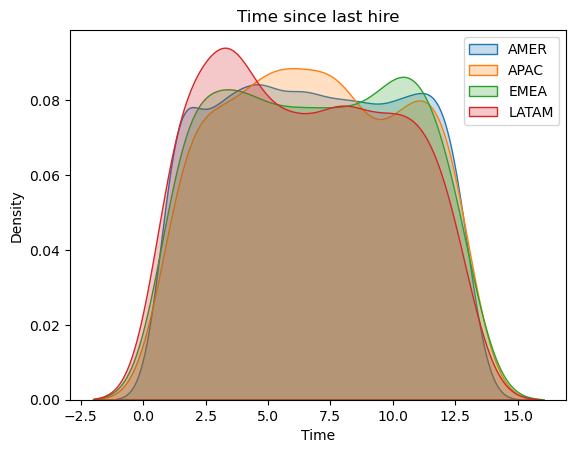

In [69]:
##How long are people from each region are in the company

for x in df['Region'].unique():
    sns.kdeplot(df[df['Region']==x]['Time_Since_Last_Hire'], label=x, fill=True)
plt.title('Time since last hire')
plt.xlabel('Time')
plt.ylabel('Density')

# Add a legend to differentiate the plots
plt.legend()

##INFERENCE

##Theres so significant changes in the distributions although LATAM has relatively higher newer employees 

## APAC has higher density of employees in 5 to 10 years range With the KDE plot as a whole forming a low in the same region 
## Which suggests higher turnover in employees in that time range which coincides with APAC regions having lowest engagement scores 

## 

In [70]:
df_senior = df[(df['Time_Since_Last_Hire']<10) & (df['Time_Since_Last_Hire']>5)]
model_engagement_1 = ols('Engagement_1 ~ Region', data=df_senior).fit()
anova_table_eng1 = sm.stats.anova_lm(model_engagement_1, typ=2)
print(anova_table_eng1)

model_engagement_2 = ols('Engagement_2 ~ Region', data=df_senior).fit()
anova_table_eng2 = sm.stats.anova_lm(model_engagement_2, typ=2)
print(anova_table_eng2)

# Perform ANOVA for Engagement_3
model_engagement_3 = ols('Engagement_3 ~ Region', data=df_senior).fit()
anova_table_eng3 = sm.stats.anova_lm(model_engagement_3, typ=2)
print(anova_table_eng3)

tukey_result_eng1 = pairwise_tukeyhsd(df_senior['Engagement_1'], df_senior['Region'])
print(tukey_result_eng1)

# Post-hoc test for Engagement_2 (Tukey's HSD)
tukey_result_eng2 = pairwise_tukeyhsd(df_senior['Engagement_2'], df_senior['Region'])
print(tukey_result_eng2)

# Post-hoc test for Engagement_3 (Tukey's HSD)
tukey_result_eng3 = pairwise_tukeyhsd(df_senior['Engagement_3'], df_senior['Region'])
print(tukey_result_eng3)


               sum_sq      df         F    PR(>F)
Region      41.238624     3.0  6.115155  0.000387
Residual  4560.972886  2029.0       NaN       NaN
               sum_sq      df          F        PR(>F)
Region     168.354183     3.0  25.759778  2.367082e-16
Residual  4420.206811  2029.0        NaN           NaN
               sum_sq      df         F   PR(>F)
Region      45.408419     3.0  5.920754  0.00051
Residual  5187.047066  2029.0       NaN      NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  AMER   APAC  -0.1986 0.2461 -0.4731  0.076  False
  AMER   EMEA   0.1514 0.5406 -0.1402 0.4431  False
  AMER  LATAM   0.3651 0.0042  0.0869 0.6433   True
  APAC   EMEA     0.35 0.0747 -0.0227 0.7227  False
  APAC  LATAM   0.5637 0.0004  0.2014  0.926   True
  EMEA  LATAM   0.2137   0.46 -0.1617 0.5891  False
---------------------------------------------------
Multiple Compariso

In [71]:
## HOW has promotion affected the employees

##From the hypothesis test Promotion only impacted Engagement_2 related to job satisfaction which is expected

## Performance was greatly impacted by the recent promotion significantly underperforming non promoted individuals
qq = ['Region','US_Ethnicity','Job_Level_','Job_Function','Gender']
for x in qq:
    unique_genders = df[x].unique()

        # Prepare the engagement score arrays for each gender
    engagement_by_gender = [df[df[x] == gender]['Performance'] for gender in unique_genders]

    anova_result = stats.f_oneway(*engagement_by_gender)



        # Extract the p-value from the result
    p_value = anova_result.pvalue
    print(f"P-value from ANOVA test: {p_value}")

        # Interpretation
    alpha = 0.05  # Significance level

    if p_value < alpha:
        print(f"Reject the null hypothesis: {x} has a statistically significant impact on Performance")
    else:
        print(f"Fail to reject the null hypothesis: {x} does not have a statistically significant impact on Performance")
    sti = 'Performance ~ '+x
    model_engagement_1 = ols(sti, data=df).fit()
    anova_table_eng1 = sm.stats.anova_lm(model_engagement_1, typ=2)
    print(anova_table_eng1)
    tukey_result_eng1 = pairwise_tukeyhsd(df['Performance'], df[x])
    print(tukey_result_eng1)

P-value from ANOVA test: 9.959381890582049e-24
Reject the null hypothesis: Region has a statistically significant impact on Performance
               sum_sq      df          F        PR(>F)
Region     177.881576     3.0  37.129168  9.959382e-24
Residual  8118.953133  5084.0        NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  AMER   APAC   0.4876    0.0  0.3391  0.6361   True
  AMER   EMEA   0.4159    0.0  0.2634  0.5685   True
  AMER  LATAM    0.235 0.0002   0.089   0.381   True
  APAC   EMEA  -0.0717 0.7885 -0.2696  0.1263  False
  APAC  LATAM  -0.2526 0.0043 -0.4456 -0.0597   True
  EMEA  LATAM   -0.181 0.0827 -0.3771  0.0151  False
----------------------------------------------------
P-value from ANOVA test: 3.802562113241332e-19
Reject the null hypothesis: US_Ethnicity has a statistically significant impact on Performance
                   sum_sq  

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
   group1   group2 meandiff p-adj   lower  upper  reject
--------------------------------------------------------
Engineering    G&A   0.0096 0.9737 -0.0931 0.1124  False
Engineering  Sales  -0.0382 0.7063  -0.151 0.0745  False
        G&A  Sales  -0.0479 0.6692 -0.1792 0.0835  False
--------------------------------------------------------
P-value from ANOVA test: 0.45998571034292013
Fail to reject the null hypothesis: Gender does not have a statistically significant impact on Performance
               sum_sq      df         F    PR(>F)
Gender       4.218397     3.0  0.862065  0.459986
Residual  8292.616312  5084.0       NaN       NaN
               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1                group2         meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------
Decline to Disclose                  Female   0.1329 

In [72]:
qq = ['Region','US_Ethnicity','Job_Level_','Job_Function','Gender']
for x in qq:
    unique_genders = df_manager[x].unique()

        # Prepare the engagement score arrays for each gender
    engagement_by_gender = [df_manager[df_manager[x] == gender]['Performance'] for gender in unique_genders]

    anova_result = stats.f_oneway(*engagement_by_gender)



        # Extract the p-value from the result
    p_value = anova_result.pvalue
    print(f"P-value from ANOVA test: {p_value}")

        # Interpretation
    alpha = 0.05  # Significance level

    if p_value < alpha:
        print(f"Reject the null hypothesis: {x} has a statistically significant impact on Performance")
    else:
        print(f"Fail to reject the null hypothesis: {x} does not have a statistically significant impact on Performance")
    sti = 'Performance ~ '+x
    model_engagement_1 = ols(sti, data=df).fit()
    anova_table_eng1 = sm.stats.anova_lm(model_engagement_1, typ=2)
    print(anova_table_eng1)
    tukey_result_eng1 = pairwise_tukeyhsd(df['Performance'], df[x])
    print(tukey_result_eng1)

P-value from ANOVA test: 0.0004247068093681585
Reject the null hypothesis: Region has a statistically significant impact on Performance
               sum_sq      df          F        PR(>F)
Region     177.881576     3.0  37.129168  9.959382e-24
Residual  8118.953133  5084.0        NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  AMER   APAC   0.4876    0.0  0.3391  0.6361   True
  AMER   EMEA   0.4159    0.0  0.2634  0.5685   True
  AMER  LATAM    0.235 0.0002   0.089   0.381   True
  APAC   EMEA  -0.0717 0.7885 -0.2696  0.1263  False
  APAC  LATAM  -0.2526 0.0043 -0.4456 -0.0597   True
  EMEA  LATAM   -0.181 0.0827 -0.3771  0.0151  False
----------------------------------------------------
P-value from ANOVA test: 0.02674435604842948
Reject the null hypothesis: US_Ethnicity has a statistically significant impact on Performance
                   sum_sq    

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
   group1   group2 meandiff p-adj   lower  upper  reject
--------------------------------------------------------
Engineering    G&A   0.0096 0.9737 -0.0931 0.1124  False
Engineering  Sales  -0.0382 0.7063  -0.151 0.0745  False
        G&A  Sales  -0.0479 0.6692 -0.1792 0.0835  False
--------------------------------------------------------
P-value from ANOVA test: 0.7800693626524312
Fail to reject the null hypothesis: Gender does not have a statistically significant impact on Performance
               sum_sq      df         F    PR(>F)
Gender       4.218397     3.0  0.862065  0.459986
Residual  8292.616312  5084.0       NaN       NaN
               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1                group2         meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------
Decline to Disclose                  Female   0.1329 0

In [73]:
unique_genders = df['Job_Level_'].unique()

    # Prepare the engagement score arrays for each gender
engagement_by_gender = [df[df['Job_Level_'] == gender]['Performance'] for gender in unique_genders]

anova_result = stats.f_oneway(*engagement_by_gender)



    # Extract the p-value from the result
p_value = anova_result.pvalue
print(f"P-value from ANOVA test: {p_value}")

    # Interpretation
alpha = 0.05  # Significance level

if p_value < alpha:
    print(f"Reject the null hypothesis: Job Level has a statistically significant impact on Performance")
else:
    print(f"Fail to reject the null hypothesis: Job Level does not have a statistically significant impact on Performance")
    
model_engagement_1 = ols('Performance ~ Promoted_Last_Cycle', data=df).fit()
anova_table_eng1 = sm.stats.anova_lm(model_engagement_1, typ=2)
print(anova_table_eng1)
tukey_result_eng1 = pairwise_tukeyhsd(df['Performance'], df['Job_Level_'])
print(tukey_result_eng1)

P-value from ANOVA test: 0.8680978270262475
Fail to reject the null hypothesis: Job Level does not have a statistically significant impact on Performance
                          sum_sq      df           F        PR(>F)
Promoted_Last_Cycle   214.443269     1.0  134.942544  8.297663e-31
Residual             8082.391440  5086.0         NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1     10   0.1756 0.8826 -0.1778 0.5291  False
     1      2   0.1224 0.9794 -0.1985 0.4434  False
     1      3    0.117 0.9841 -0.2009 0.4349  False
     1      4   0.1641 0.8165 -0.1402 0.4684  False
     1      5   0.0924 0.9966 -0.2123  0.397  False
     1      6   0.1657 0.8542 -0.1551 0.4866  False
     1      7    0.158 0.8707 -0.1545 0.4705  False
     1      8   0.0961 0.9986 -0.2559 0.4481  False
     1      9    0.125  0.989 -0.2315 0.4815  False
     1 INTERN   0.074

In [74]:

unique_genders = df['High_Potential'].unique()

    # Prepare the engagement score arrays for each gender
engagement_by_gender = [df[df['High_Potential'] == gender]['Performance'] for gender in unique_genders]

anova_result = stats.f_oneway(*engagement_by_gender)



    # Extract the p-value from the result
p_value = anova_result.pvalue
print(f"P-value from ANOVA test: {p_value}")

    # Interpretation
alpha = 0.05  # Significance level

if p_value < alpha:
    print(f"Reject the null hypothesis: Potential has a statistically significant impact on Performance")
else:
    print(f"Fail to reject the null hypothesis: Potential does not have a statistically significant impact on Performance")
    
model_engagement_1 = ols('Performance ~ High_Potential', data=df).fit()
anova_table_eng1 = sm.stats.anova_lm(model_engagement_1, typ=2)
print(anova_table_eng1)
tukey_result_eng1 = pairwise_tukeyhsd(df['Performance'], df['High_Potential'])
print(tukey_result_eng1)

P-value from ANOVA test: 2.9933604385684172e-65
Reject the null hypothesis: Potential has a statistically significant impact on Performance
                     sum_sq      df           F        PR(>F)
High_Potential   461.447198     1.0  299.528319  2.993360e-65
Residual        7835.387512  5086.0         NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   0.0    1.0   1.3482   0.0 1.1955 1.5009   True
-------------------------------------------------


In [ ]:
unique_genders = df['Promoted_Last_Cycle'].unique()

    # Prepare the engagement score arrays for each gender
engagement_by_gender = [df[df['Promoted_Last_Cycle'] == gender]['Performance'] for gender in unique_genders]

anova_result = stats.f_oneway(*engagement_by_gender)



    # Extract the p-value from the result
p_value = anova_result.pvalue
print(f"P-value from ANOVA test: {p_value}")

    # Interpretation
alpha = 0.05  # Significance level

if p_value < alpha:
    print(f"Reject the null hypothesis: Promoted Last Cycle has a statistically significant impact on Performance")
else:
    print(f"Fail to reject the null hypothesis: Promoted Last Cycle does not have a statistically significant impact on Performance")
    
model_engagement_1 = ols('Performance ~ Promoted_Last_Cycle', data=df).fit()
anova_table_eng1 = sm.stats.anova_lm(model_engagement_1, typ=2)
print(anova_table_eng1)
tukey_result_eng1 = pairwise_tukeyhsd(df['Performance'], df['Promoted_Last_Cycle'])
print(tukey_result_eng1)

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.power import zt_ind_solve_power

# Data

count_1 = df['Job_Level_'].value_counts()[1]  # Number of High_Potential = 1
count_0 = df['Job_Level_'].value_counts()[0]  # Number of High_Potential = 0
nobs_total = count_0 + count_1  # Total observations

# Calculate the proportions for each group
p1 = count_1 / nobs_total  # Proportion of High_Potential = 1
p0 = count_0 / nobs_total  # Proportion of High_Potential = 0

# Step 2: Calculate effect size based on the proportions
effect_size = proportion_effectsize(p1, p0)

# Step 3: Perform power analysis to determine sample size for a two-sided test
alpha = 0.05  # significance level
power = 0.8  # desired power

# Calculate the minimum required sample size per group
sample_size = zt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')

# Output results
print(f"Effect size: {effect_size}")
print(f"Required sample size per group: {sample_size}")

In [ ]:
##Manager Analysis



In [ ]:
sns.kdeplot(df_manager['Mgr_Effectiveness_Score'], label='Manager Effectiveness Score', fill=True)


In [ ]:
job_functions = df['Is_Manager?'].unique()

# Define number of rows and columns for the grid (adjust depending on how many job functions you have)
n_cols = 2  # Number of columns in the grid
n_rows = (len(job_functions) + n_cols - 1) // n_cols  # Number of rows needed

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()
p = 0
# Loop through each job function and plot the KDEs on each subplot
for i, job in enumerate(job_functions):
    df_job = df[df['Is_Manager?'] == job]
    
    # Plot KDEs for eng1, eng2, and eng3
    sns.kdeplot(df_job['Engagement_1'], label='Engagement_1', fill=True, ax=axes[i])
    sns.kdeplot(df_job['Engagement_2'], label='Engagement_2', fill=True, ax=axes[i])
    sns.kdeplot(df_job['Engagement_3'], label='Engagement_3', fill=True, ax=axes[i])
    axes[i].set_xlim(0, 8)
    axes[i].set_ylim(0, 0.5)
    
    axes[i].set_title(f'KDE for {job}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    p = i
# sns.kdeplot(df['Engagement_1'], label='Engagement_1', fill=True, ax=axes[p+1])
# sns.kdeplot(df['Engagement_2'], label='Engagement_2', fill=True, ax=axes[p+1])
# sns.kdeplot(df['Engagement_3'], label='Engagement_3', fill=True, ax=axes[p+1])
# axes[p+1].set_xlim(0, 8)
# axes[p+1].set_ylim(0, 0.5)
# axes[p+1].set_title(f'KDE for All Job Functions')
# axes[p+1].set_xlabel('Values')
# axes[p+1].set_ylabel('Density')
# axes[p+1].legend()


plt.tight_layout()
plt.show()

In [ ]:
job_functions = df['Is_Manager?'].unique()

# Define number of rows and columns for the grid (adjust depending on how many job functions you have)
n_cols = 2  # Number of columns in the grid
n_rows = (len(job_functions) + n_cols - 1) // n_cols  # Number of rows needed

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()
p = 0
# Loop through each job function and plot the KDEs on each subplot
for i, job in enumerate(job_functions):
    df_job = df[df['Is_Manager?'] == job]
    
    # Plot KDEs for eng1, eng2, and eng3
    sns.kdeplot(df_job['Performance'], label='Performance', fill=True, ax=axes[i])
    axes[i].set_xlim(0, 8)
    axes[i].set_ylim(0, 0.5)
    
    axes[i].set_title(f'KDE for {job}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    p = i
# sns.kdeplot(df['Engagement_1'], label='Engagement_1', fill=True, ax=axes[p+1])
# sns.kdeplot(df['Engagement_2'], label='Engagement_2', fill=True, ax=axes[p+1])
# sns.kdeplot(df['Engagement_3'], label='Engagement_3', fill=True, ax=axes[p+1])
# axes[p+1].set_xlim(0, 8)
# axes[p+1].set_ylim(0, 0.5)
# axes[p+1].set_title(f'KDE for All Job Functions')
# axes[p+1].set_xlabel('Values')
# axes[p+1].set_ylabel('Density')
# axes[p+1].legend()


plt.tight_layout()
plt.show()


##No considerable difference in performance theres a slighly lesser population on lower side of performance scale
##

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Performance' , y='Mgr_Effectiveness_Score', data=df_manager)

# Add labels and title
plt.xlabel('Performance')
plt.ylabel('MGR Effectiveness Score')
plt.title('Scatter Plot')

In [ ]:
unique_genders = df_manager['Training_Attendance'].unique()

    # Prepare the engagement score arrays for each gender
performance_by_training = [df[df['Training_Attendance'] == gender]['Performance'] for gender in unique_genders]

anova_result = stats.f_oneway(*performance_by_training)



    # Extract the p-value from the result
p_value = anova_result.pvalue
print(f"P-value from ANOVA test: {p_value}")

    # Interpretation
alpha = 0.05  # Significance level

if p_value < alpha:
    print(f"Reject the null hypothesis: Training has a statistically significant impact on Performance")
else:
    print(f"Fail to reject the null hypothesis: Training does not have a statistically significant impact on Performance")


In [ ]:
df_manager[df_manager['Training_Attendance']==1]

In [ ]:
sns.kdeplot(df_manager[df['Training_Attendance']==1]['Performance'], label='with Training', fill=True)
sns.kdeplot(df_manager[df['Training_Attendance']==0]['Performance'], label='without Training', fill=True)
plt.legend()

In [ ]:
sns.kdeplot(df_non_manager[df_non_manager['Training_Attendance']==1]['Performance'], label='with Training', fill=True)
sns.kdeplot(df_non_manager[df_non_manager['Training_Attendance']==0]['Performance'], label='without Training', fill=True)
plt.legend()

In [ ]:
##Check average experience of each dept

##Check the avg time from hire for candidates who were promoted

##

df[['Job_Function','Time_Since_Last_Hire']].groupby('Job_Function').mean()

In [ ]:
##Promotions in sales and Engineering are a bit delayed compared to G&A

df[df['Promoted_Last_Cycle']==1][['Job_Function','Time_Since_Last_Hire']].groupby('Job_Function').mean()

In [ ]:
import scipy.stats as stats

# Assuming df is your DataFrame with engagement and gender columns
# df = pd.read_csv('your_data.csv')

# Perform ANOVA test if there are more than two groups in the gender column

AA = ['Engagement_1','Engagement_2','Engagement_3']

for x in AA:

    unique_genders = df['High_Potential'].unique()

    # Prepare the engagement score arrays for each gender
    engagement_by_gender = [df[df['High_Potential'] == gender][x] for gender in unique_genders]

    anova_result = stats.f_oneway(*engagement_by_gender)



    # Extract the p-value from the result
    p_value = anova_result.pvalue
    print(f"P-value from ANOVA test: {p_value}")

    # Interpretation
    alpha = 0.05  # Significance level

    if p_value < alpha:
        print(f"Reject the null hypothesis: Job Function has a statistically significant impact on {x}")
    else:
        print(f"Fail to reject the null hypothesis: Job Function does not have a statistically significant impact on {x}")


In [ ]:
import scipy.stats as stats

# Assuming df is your DataFrame with engagement and gender columns
# df = pd.read_csv('your_data.csv')

# Perform ANOVA test if there are more than two groups in the gender column

AA = ['Engagement_1','Engagement_2','Engagement_3']

for x in AA:

    unique_genders = df['Job_Level_'].unique()

    # Prepare the engagement score arrays for each gender
    engagement_by_gender = [df[df['Job_Level_'] == gender][x] for gender in unique_genders]

    anova_result = stats.f_oneway(*engagement_by_gender)



    # Extract the p-value from the result
    p_value = anova_result.pvalue
    print(f"P-value from ANOVA test: {p_value}")

    # Interpretation
    alpha = 0.05  # Significance level

    if p_value < alpha:
        print(f"Reject the null hypothesis: Job Level has a statistically significant impact on {x}")
    else:
        print(f"Fail to reject the null hypothesis: Job Level does not have a statistically significant impact on {x}")


In [ ]:
sns.lineplot(x='Performance' , y='Time_Since_Last_Hire', data=df)

In [ ]:
##hiring analysis
df_hiring = pd.read_csv('roblox_ats.csv')
df_hiring['Is_Hired'] = np.where(df_hiring['Employee ID'].isna(), 0, 1)
df_hiring.drop(columns=['Unnamed: 0','Candidate ID','Employee ID'],axis=1,inplace=True)
df_hiring.to_csv('hiring_analytics.csv')

In [ ]:
AA = ['Interview_Score_1', 'Interview_Score_2',
       'Interview_Score_3', 'Hiring_Manager_Interview_Score_','Performance']

for x in AA:

    unique_genders = df['Job_Level_'].unique()

    # Prepare the engagement score arrays for each gender
    engagement_by_gender = [df[df['Job_Level_'] == gender][x] for gender in unique_genders]

    anova_result = stats.f_oneway(*engagement_by_gender)



    # Extract the p-value from the result
    p_value = anova_result.pvalue
    print(f"P-value from ANOVA test: {p_value}")

    # Interpretation
    alpha = 0.05  # Significance level

    if p_value < alpha:
        print(f"Reject the null hypothesis: Job Level has a statistically significant impact on {x}")
    else:
        print(f"Fail to reject the null hypothesis: Job Level does not have a statistically significant impact on {x}")

In [ ]:
df[['Interview_Score_1', 'Interview_Score_2',
       'Interview_Score_3', 'Hiring_Manager_Interview_Score_','Performance']].corr()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(df[['Interview_Score_1', 'Interview_Score_2',
       'Interview_Score_3', 'Hiring_Manager_Interview_Score_']], df['Performance'])

# Get the coefficients
coefficients = model.coef_[0]

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(ticks=range(len(coefficients)), labels=['Interview_Score_1', 'Interview_Score_2',
       'Interview_Score_3', 'Hiring_Manager_Interview_Score_'], rotation=90, ha='center')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.show()


There is no significant impact of interview scores on Performance

In [ ]:
coefficients

In [ ]:
group1 = df['Performance']
group2 = df['Engagement_1']

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(group1, group2)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

In [ ]:
group1 = df['Time_Since_Last_Hire']
group2 = df['Engagement_3']
print(group1.corr(group2))
# Perform ANOVA test
f_stat, p_value = stats.f_oneway(group1, group2)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

In [ ]:
import statsmodels.api as sm

# Define the dependent and independent variables
X = df['Time_Since_Last_Hire']
y = df['Engagement_3']

# Add a constant to the independent variable (intercept term)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

In [ ]:
plt.scatter(group2, group1)
plt.ylabel('Time Since Hire')
plt.xlabel('Engagement_1')
plt.title('Performance vs. Time Since Hire')
plt.show()

In [75]:
df.columns

Index(['Job_Function', 'Employee_ID', 'Job_Level_', 'Is_Manager?', 'Gender',
       'Region', 'US_Ethnicity', 'Engagement_1', 'Engagement_2',
       'Engagement_3', 'Mgr_Effectiveness_Score', 'Performance',
       'High_Potential', 'Promoted_Last_Cycle', 'Time_Since_Last_Hire',
       'Training_Attendance', 'Interview_Score_1', 'Interview_Score_2',
       'Interview_Score_3', 'Hiring_Manager_Interview_Score_',
       'Job_Function_Numerical', 'Gender_Numerical', 'Region_Numerical',
       'US_Ethnicity_Numerical', 'Mgr_Effectiveness_Score_imputed',
       'Job_Level_Numerical'],
      dtype='object')

In [82]:
df[(df['Promoted_Last_Cycle']==1)&(df['Is_Manager?']==1)]['Performance'].mean()

4.571428571428571

In [83]:
df[(df['Promoted_Last_Cycle']==0)&(df['Is_Manager?']==1)]['Performance'].mean()

3.1745886654478976